In [12]:
# Save cleaned data
output_path = '../data/processed/fiscal_data_clean.csv'
df_clean.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved to: {output_path}")
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Countries: {df_clean['Country'].nunique()}")
print(f"Years: {df_clean['Year'].min():.0f} - {df_clean['Year'].max():.0f}")
print(f"Total Country-Year observations: {len(df_clean):,}")
print(f"\n🎉 Phase 2: Data Cleaning COMPLETE!")

✅ Cleaned data saved to: ../data/processed/fiscal_data_clean.csv

Final dataset shape: (623, 28)
Countries: 14
Years: 1960 - 2025
Total Country-Year observations: 623

🎉 Phase 2: Data Cleaning COMPLETE!


## Step 8: Save Cleaned Data

In [11]:
# Strategic imputation approach
# For time-series data by country, use forward-fill then backward-fill
# This preserves country-specific trends

print("Applying strategic imputation...")
print("Method: Forward-fill → Backward-fill within each country")
print("Rationale: Preserves country-specific economic trends\n")

# Create a copy for imputation
df_clean = df_pivot.copy()

# Get numeric columns (indicators)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
metadata_cols = ['Country', 'Country Code', 'Year']
indicator_cols = [col for col in numeric_cols if col not in metadata_cols]

# Impute by country (preserves country-specific patterns)
for country in df_clean['Country'].unique():
    country_mask = df_clean['Country'] == country
    
    # Forward fill then backward fill for this country
    df_clean.loc[country_mask, indicator_cols] = df_clean.loc[country_mask, indicator_cols].fillna(method='ffill').fillna(method='bfill')

# For any remaining NaNs, use median (cross-country)
for col in indicator_cols:
    if df_clean[col].isna().any():
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"  - {col}: Used median imputation ({median_val:.2f})")

print("\n" + "="*50)
print("Imputation Results:")
print(f"Remaining missing values: {df_clean[indicator_cols].isnull().sum().sum()}")
print("\n✅ Missing values handled strategically!")

Applying strategic imputation...
Method: Forward-fill → Backward-fill within each country
Rationale: Preserves country-specific economic trends

  - Budget Deficit/Surplus: Used median imputation (-427.40)
  - Capital Expenditure: Used median imputation (2611.30)
  - Consumer Price Index (CPI): Used median imputation (99.50)
  - Defence Expenditure: Used median imputation (6085.00)
  - Education Expenditure: Used median imputation (11701.00)
  - Expenditure: Used median imputation (2894.92)
  - Exports: Used median imputation (7095.90)
  - Food Inflation: Used median imputation (7.28)
  - Food Inflation YoY: Used median imputation (7.02)
  - GDP Growth Rate: Used median imputation (4.39)
  - GDP per Capita: Used median imputation (2453.16)
  - GDP per capita: Used median imputation (70163.00)
  - Government Debt: Used median imputation (22276.20)
  - Health Expenditure: Used median imputation (8585.00)
  - Imports: Used median imputation (7297.30)
  - Inflation Rate: Used median imputa

C:\Users\USER\AppData\Local\Temp\ipykernel_15468\41531400.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[country_mask, indicator_cols] = df_clean.loc[country_mask, indicator_cols].fillna(method='ffill').fillna(method='bfill')
C:\Users\USER\AppData\Local\Temp\ipykernel_15468\41531400.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[country_mask, indicator_cols] = df_clean.loc[country_mask, indicator_cols].fillna(method='ffill').fillna(method='bfill')
C:\Users\USER\AppData\Local\Temp\ipykernel_15468\41531400.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.loc[country_mask, indicator_cols] = df_clean.loc[country_mask, indicator_cols].fillna(method='ffill').fillna(metho

Missing Values Analysis (Wide Format):
                                                Column  Missing_Count  \
Indicator                                                               
Food Inflation YoY                  Food Inflation YoY            620   
GDP per capita                          GDP per capita            613   
Education Expenditure            Education Expenditure            604   
Labour Force                              Labour Force            586   
Health Expenditure                  Health Expenditure            580   
GDP per Capita                          GDP per Capita            565   
Value Added Tax (VAT)            Value Added Tax (VAT)            561   
Unemployment Rate                    Unemployment Rate            557   
Defence Expenditure                Defence Expenditure            551   
Food Inflation                          Food Inflation            524   
Government Debt                        Government Debt            447   
Capital Expe

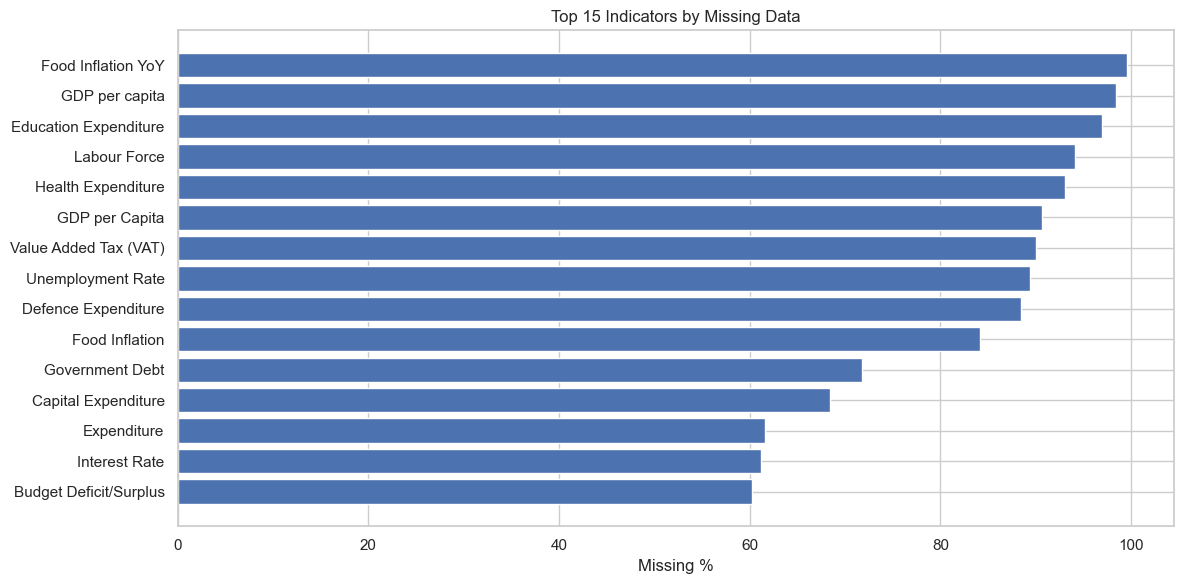

In [10]:
# Analyze missing values in pivoted data
missing_analysis = pd.DataFrame({
    'Column': df_pivot.columns,
    'Missing_Count': df_pivot.isnull().sum(),
    'Missing_Pct': (df_pivot.isnull().sum() / len(df_pivot) * 100).round(2)
}).sort_values('Missing_Pct', ascending=False)

print("Missing Values Analysis (Wide Format):")
print(missing_analysis[missing_analysis['Missing_Count'] > 0])

# Visualize missing data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
missing_cols = missing_analysis[missing_analysis['Missing_Count'] > 0].head(15)
ax.barh(missing_cols['Column'], missing_cols['Missing_Pct'])
ax.set_xlabel('Missing %')
ax.set_title('Top 15 Indicators by Missing Data')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Step 7: Handle Missing Values (Strategic Imputation)

In [9]:
# Pivot to wide format: Each row = Country-Year, Each column = Indicator
df_pivot = df_agg.pivot_table(
    index=['Country', 'Country Code', 'Year'],
    columns='Indicator',
    values='Amount_Clean',
    aggfunc='first'  # In case of duplicates, take first
).reset_index()

print("Pivot Transformation:")
print(f"Wide format shape: {df_pivot.shape}")
print(f"Rows (Country-Year combinations): {len(df_pivot):,}")
print(f"Columns (Indicators + metadata): {len(df_pivot.columns)}")

print("\n" + "="*50)
print("Column names (Indicators):")
print(df_pivot.columns.tolist())

print("\n✅ Data successfully pivoted to wide format!")
df_pivot.head()

Pivot Transformation:
Wide format shape: (623, 28)
Rows (Country-Year combinations): 623
Columns (Indicators + metadata): 28

Column names (Indicators):
['Country', 'Country Code', 'Year', 'Budget Deficit/Surplus', 'Capital Expenditure', 'Consumer Price Index (CPI)', 'Defence Expenditure', 'Education Expenditure', 'Expenditure', 'Exports', 'Food Inflation', 'Food Inflation YoY', 'GDP Growth Rate', 'GDP per Capita', 'GDP per capita', 'Government Debt', 'Health Expenditure', 'Imports', 'Inflation Rate', 'Interest Rate', 'Labour Force', 'Nominal GDP', 'Population', 'Real GDP', 'Revenue', 'Tax Revenue', 'Unemployment Rate', 'Value Added Tax (VAT)']

✅ Data successfully pivoted to wide format!


Indicator,Country,Country Code,Year,Budget Deficit/Surplus,Capital Expenditure,Consumer Price Index (CPI),Defence Expenditure,Education Expenditure,Expenditure,Exports,Food Inflation,Food Inflation YoY,GDP Growth Rate,GDP per Capita,GDP per capita,Government Debt,Health Expenditure,Imports,Inflation Rate,Interest Rate,Labour Force,Nominal GDP,Population,Real GDP,Revenue,Tax Revenue,Unemployment Rate,Value Added Tax (VAT)
0,Algeria,DZA,1977.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,DZA,1978.0,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,DZA,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,DZA,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 6: Pivot from Long to Wide Format (CRITICAL TRANSFORMATION)

In [8]:
# Aggregate monthly data to yearly
df_agg = df.groupby(['Country', 'Country Code', 'Indicator', 'Year'], as_index=False).agg({
    'Amount_Clean': 'mean',  # Average for monthly data
    'Source': 'first',
    'Unit': 'first',
    'Currency': 'first'
})

print("Aggregation Results:")
print(f"Before aggregation: {len(df):,} rows")
print(f"After aggregation: {len(df_agg):,} rows")
print(f"Reduction: {len(df) - len(df_agg):,} rows ({(1 - len(df_agg)/len(df))*100:.1f}%)")
print("\n✅ Monthly data aggregated to yearly averages!")

df_agg.head(10)

Aggregation Results:
Before aggregation: 23,784 rows
After aggregation: 4,871 rows
Reduction: 18,913 rows (79.5%)

✅ Monthly data aggregated to yearly averages!


,Country,Country Code,Indicator,Year,Amount_Clean,Source,Unit,Currency
0,Algeria,DZA,Consumer Price Index (CPI),2002.0,101.432500,Bank of Algeria,Points,None
1,Algeria,DZA,Consumer Price Index (CPI),2003.0,105.755000,Bank of Algeria,Points,None
2,Algeria,DZA,Consumer Price Index (CPI),2004.0,109.951667,Bank of Algeria,Points,None
3,Algeria,DZA,Consumer Price Index (CPI),2005.0,111.471667,Bank of Algeria,Points,None
4,Algeria,DZA,Consumer Price Index (CPI),2006.0,114.048333,Bank of Algeria,Points,None
5,Algeria,DZA,Consumer Price Index (CPI),2007.0,118.244167,Bank of Algeria,Points,None
6,Algeria,DZA,Consumer Price Index (CPI),2008.0,123.989167,Bank of Algeria,Points,None
7,Algeria,DZA,Consumer Price Index (CPI),2009.0,131.102500,Bank of Algeria,Points,None
8,Algeria,DZA,Consumer Price Index (CPI),2010.0,136.230000,Bank of Algeria,Points,None
9,Algeria,DZA,Consumer Price Index (CPI),2011.0,142.393333,Bank of Algeria,Points,None


In [7]:
# Check frequency distribution
print("Frequency Distribution:")
print(df['Frequency'].value_counts())

# Identify monthly indicators
monthly_indicators = df[df['Frequency'] == 'Monthly']['Indicator'].unique()
print(f"\n{'='*50}")
print(f"Monthly indicators ({len(monthly_indicators)}):")
for ind in monthly_indicators:
    count = len(df[(df['Indicator'] == ind) & (df['Frequency'] == 'Monthly')])
    print(f"  - {ind}: {count:,} records")

# Strategy: Aggregate monthly data to yearly averages
print(f"\n{'='*50}")
print("Aggregation Strategy:")
print("- Monthly data → Yearly AVERAGE (for rates like Inflation)")
print("- Yearly data → Keep as-is")

Frequency Distribution:
Frequency
Monthly      16850
Yearly        3710
Quarterly     3224
Name: count, dtype: int64

Monthly indicators (14):
  - Budget Deficit/Surplus: 1,123 records
  - Capital Expenditure: 473 records
  - Consumer Price Index (CPI): 2,796 records
  - Expenditure: 636 records
  - Exports: 988 records
  - Food Inflation: 1,060 records
  - Food Inflation YoY: 30 records
  - Government Debt: 919 records
  - Imports: 986 records
  - Inflation Rate: 2,986 records
  - Interest Rate: 2,643 records
  - Revenue: 1,437 records
  - Tax Revenue: 477 records
  - Value Added Tax (VAT): 296 records

Aggregation Strategy:
- Monthly data → Yearly AVERAGE (for rates like Inflation)
- Yearly data → Keep as-is


## Step 5: Handle Frequency Aggregation (Monthly → Yearly)

In [6]:
# Convert Time to datetime and extract Year
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Year'] = df['Time'].dt.year

print("Time column processing:")
print(f"Valid dates: {df['Time'].notna().sum():,}")
print(f"Invalid dates: {df['Time'].isna().sum()}")
print(f"\nYear range: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"Total years covered: {df['Year'].nunique()}")

# Show year distribution
year_dist = df['Year'].value_counts().sort_index()
print("\nTop 10 years by data points:")
print(year_dist.head(10))

Time column processing:
Valid dates: 23,780
Invalid dates: 4

Year range: 1960 - 2025
Total years covered: 66

Top 10 years by data points:
Year
1960.0    52
1961.0    55
1962.0    55
1963.0    55
1964.0    56
1965.0    60
1966.0    61
1967.0    61
1968.0    61
1969.0    61
Name: count, dtype: int64


## Step 4: Clean Time Column & Extract Year

In [5]:
# Clean and convert Amount column
def clean_amount(value):
    """
    Clean the Amount column by removing:
    - Commas (e.g., '3,883' -> '3883')
    - Non-breaking spaces (e.g., '\xa0103.60' -> '103.60')
    - Regular spaces
    """
    if pd.isna(value):
        return np.nan
    
    # Convert to string
    value_str = str(value)
    
    # Remove non-breaking spaces (\xa0), commas, and regular spaces
    value_str = value_str.replace('\xa0', '').replace(',', '').replace(' ', '')
    
    # Try to convert to float
    try:
        return float(value_str)
    except:
        return np.nan

# Apply cleaning
print("Cleaning Amount column...")
df['Amount_Clean'] = df['Amount'].apply(clean_amount)

# Validation
print("\n" + "="*50)
print("Conversion Results:")
print(f"Original non-null: {df['Amount'].notna().sum():,}")
print(f"Cleaned non-null: {df['Amount_Clean'].notna().sum():,}")
print(f"Values lost: {df['Amount'].notna().sum() - df['Amount_Clean'].notna().sum()}")
print(f"New data type: {df['Amount_Clean'].dtype}")
print("\n✅ Amount column successfully converted to numeric!")

# Show before/after comparison
comparison = df[['Country', 'Indicator', 'Amount', 'Amount_Clean']].head(10)
print("\nBefore/After Comparison:")
print(comparison)

Cleaning Amount column...

Conversion Results:
Original non-null: 23,725
Cleaned non-null: 23,725
Values lost: 0
New data type: float64

✅ Amount column successfully converted to numeric!

Before/After Comparison:
  Country               Indicator   Amount  Amount_Clean
0   Egypt  Budget Deficit/Surplus   -56213      -56213.0
1   Egypt  Budget Deficit/Surplus   -67563      -67563.0
2   Egypt  Budget Deficit/Surplus   -72379      -72379.0
3   Egypt  Budget Deficit/Surplus   -98886      -98886.0
4   Egypt  Budget Deficit/Surplus  -134138     -134138.0
5   Egypt  Budget Deficit/Surplus  -165689     -165689.0
6   Egypt  Budget Deficit/Surplus  -246853     -246853.0
7   Egypt  Budget Deficit/Surplus  -254715     -254715.0
8   Egypt  Budget Deficit/Surplus  -284314     -284314.0
9   Egypt  Budget Deficit/Surplus      NaN           NaN


In [4]:
# Analyze the Amount column issues
print("Current Amount data type:", df['Amount'].dtype)
print(f"Non-null values: {df['Amount'].notna().sum():,}")

# Check for problematic values
sample_values = df['Amount'].head(20).tolist()
print("\nSample values:", sample_values[:10])

# Identify non-numeric patterns
non_numeric = df[pd.to_numeric(df['Amount'], errors='coerce').isna() & df['Amount'].notna()]
print(f"\nNon-numeric values found: {len(non_numeric):,}")
if len(non_numeric) > 0:
    print("Sample problematic values:")
    print(non_numeric['Amount'].head(10).tolist())

Current Amount data type: object
Non-null values: 23,725

Sample values: ['-56213', '-67563', '-72379', '-98886', '-134138', '-165689', '-246853', '-254715', '-284314', nan]

Non-numeric values found: 443
Sample problematic values:
['\xa0103.60', '\xa0105.45', '107.65\xa0', '109.84\xa0', '114.45\xa0', '\xa0127.03', '3,883', '3,449', '3,833', '2,900']


## Step 3: Convert Amount Column to Numeric

In [3]:
# Create a copy to preserve raw data
df = df_raw.copy()

# Strip whitespace from Indicator column
print("Before cleaning:")
print(f"Unique indicators: {df['Indicator'].nunique()}")
print("\nIndicators with issues:")
print([ind for ind in df['Indicator'].unique() if ind != ind.strip()])

# Clean the indicators
df['Indicator'] = df['Indicator'].str.strip()

print("\n" + "="*50)
print("After cleaning:")
print(f"Unique indicators: {df['Indicator'].nunique()}")
print("\n✅ Duplicate indicators consolidated!")

Before cleaning:
Unique indicators: 27

Indicators with issues:
['Food Inflation ', 'GDP per Capita ', 'Inflation Rate ']

After cleaning:
Unique indicators: 25

✅ Duplicate indicators consolidated!


## Step 2: Fix Duplicate Indicators (Trailing Spaces)

In [2]:
# Load the raw data
df_raw = pd.read_csv('../data/raw/10Alytics Hackathon- Fiscal Data.csv')

print(f"Raw dataset loaded: {df_raw.shape}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
df_raw.head()

Raw dataset loaded: (23784, 9)
Memory usage: 11.66 MB


,Country,Indicator,Source,Unit,Currency,Frequency,Country Code,Time,Amount
0,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2007-01-01,-56213
1,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2008-01-01,-67563
2,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2009-01-01,-72379
3,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2010-01-01,-98886
4,Egypt,Budget Deficit/Surplus,Central Bank of Egypt,Million,EGP,Yearly,EGY,2011-01-01,-134138


## Step 1: Load Raw Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_theme(style="whitegrid")
%matplotlib inline

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!
